# Fitting the Longitudinal Profile of a Gaussian Beam 
### Fitting parameters:
* waist = w0
* waist position = offset
* M-square = M2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

#Style setting
sns.set(style="darkgrid")

#Quick Conversions to SI units
nm = 1e-9
um = 1e-6
mm = 1e-3


### Global Variables

In [2]:
n = 100
z = np.linspace(-1,1,n)
sW = np.random.normal(0,scale = 5*um, size=n)
ri = 1 # refractive index medium
wavelength = 1064 *nm 

### Define Fitting Fuction

In [3]:
#Beam Profile
def beamProfile( z, w0=1*mm, M2 =1,offset=.5):
   
    z_R = (np.pi * w0**2 ) / (wavelength* ri* M2)
    w = w0*np.sqrt(1+((z+offset)/z_R)**2)
    
    return w

### Define Fit

In [4]:
def fitBeamProfile(sW,z,n):
    
    w = beamProfile(z)+ sW
    params, covariance = curve_fit(beamProfile, z, w)
    print("Fitted parameters:", params)
    z_fit = z
    w_fit = beamProfile(z_fit,params[0], params[1], params[2])
    
    return z_fit,w_fit, w,z, covariance


In [5]:
z_fit, w_fit, w, z, covariance = fitBeamProfile(sW,z,n);

Fitted parameters: [9.99514926e-04 1.01467865e+00 4.92088263e-01]


### Plot residuals


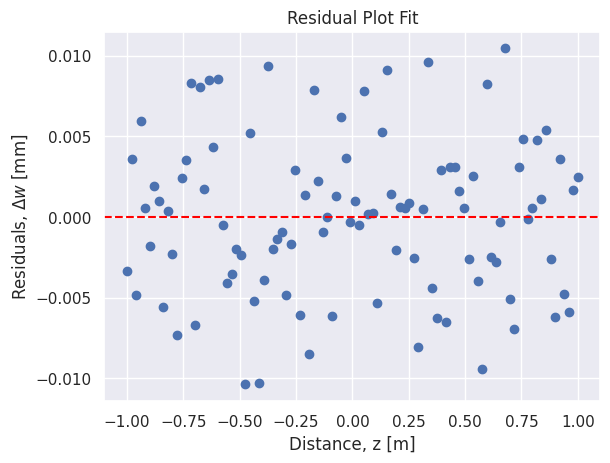

In [7]:
residuals = w - w_fit
plt.scatter(z, residuals/mm)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Distance, z [m]')
plt.ylabel('Residuals, $\Delta w$ [mm]')
plt.title('Residual Plot Fit')
plt.show()

### Plot Fit

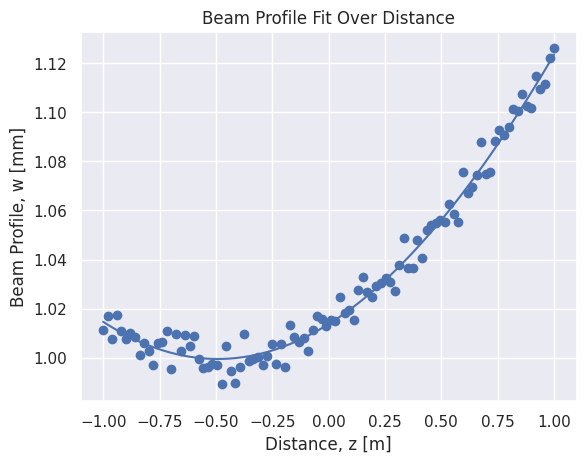

In [8]:
plt.title("Beam Profile Fit Over Distance")
plt.xlabel("Distance, z [m]")
plt.ylabel("Beam Profile, w [mm]")
plt.scatter(z,w/mm)
plt.plot(z_fit,w_fit/mm)
plt.show()

In [9]:
covariance

array([[ 4.53404936e-13, -2.04445931e-09, -6.80003942e-10],
       [-2.04445931e-09,  2.06501582e-04, -1.99573748e-04],
       [-6.80003942e-10, -1.99573748e-04,  2.43590571e-04]])